In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/train.csv')

# Display basic information and first few rows
df_info = df.info()
df_head = df.head()

df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


(None,
    count  hate_speech_count  offensive_language_count  neither_count  class  \
 0      3                  0                         0              3      2   
 1      3                  0                         3              0      1   
 2      3                  0                         3              0      1   
 3      3                  0                         2              1      1   
 4      6                  0                         6              0      1   
 
                                                tweet  
 0  !!! RT @mayasolovely: As a woman you shouldn't...  
 1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
 2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
 3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
 4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  )

In [3]:
import re
import string
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Define a preprocessing function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove user mentions and hashtags
    text = re.sub(r'\@\w+|\#', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply preprocessing to the tweet column
df['cleaned_tweet'] = df['tweet'].apply(preprocess_text)
df.T

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,0,1,2,3,4,5,6,7,8,9,...,24773,24774,24775,24776,24777,24778,24779,24780,24781,24782
count,3,3,3,3,6,3,3,3,3,3,...,3,3,3,3,3,3,3,3,6,3
hate_speech_count,0,0,0,0,0,1,0,0,0,1,...,1,0,0,3,2,0,0,0,0,0
offensive_language_count,0,3,3,2,6,2,3,3,3,2,...,2,3,3,0,1,2,1,3,6,0
neither_count,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,2,0,0,3
class,2,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,1,2,1,1,2
tweet,!!! RT @mayasolovely: As a woman you shouldn't...,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...","!!!!!!""@__BrighterDays: I can not just sit up ...",!!!!&#8220;@selfiequeenbri: cause I'm tired of...,""" &amp; you might not get ya bitch back &amp; ...",""" @rhythmixx_ :hobbies include: fighting Maria...",...,you niggers cheat on ya gf's? smh....,you really care bout dis bitch. my dick all in...,"you worried bout other bitches, you need me for?",you're all niggers,you're such a retard i hope you get type 2 dia...,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,"you've gone and broke the wrong heart baby, an...",young buck wanna eat!!.. dat nigguh like I ain...,youu got wild bitches tellin you lies,~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
cleaned_tweet,rt woman shouldnt complain cleaning house amp ...,rt boy dats coldtyga dwn bad cuffin dat hoe st...,rt dawg rt ever fuck bitch start cry confused ...,rt look like tranny,rt shit hear might true might faker bitch told ya,shit blows meclaim faithful somebody still fuc...,sit hate another bitch got much shit going,cause im tired big bitches coming us skinny girls,amp might get ya bitch back amp thats,hobbies include fighting mariam bitch,...,niggers cheat ya gfs smh,really care bout dis bitch dick yo feelings,worried bout bitches need,youre niggers,youre retard hope get type diabetes die sugar ...,yous muthafin lie right tl trash mine bible sc...,youve gone broke wrong heart baby drove rednec...,young buck wanna eat dat nigguh like aint fuck...,youu got wild bitches tellin lies,ruffled ntac eileen dahlia beautiful color com...


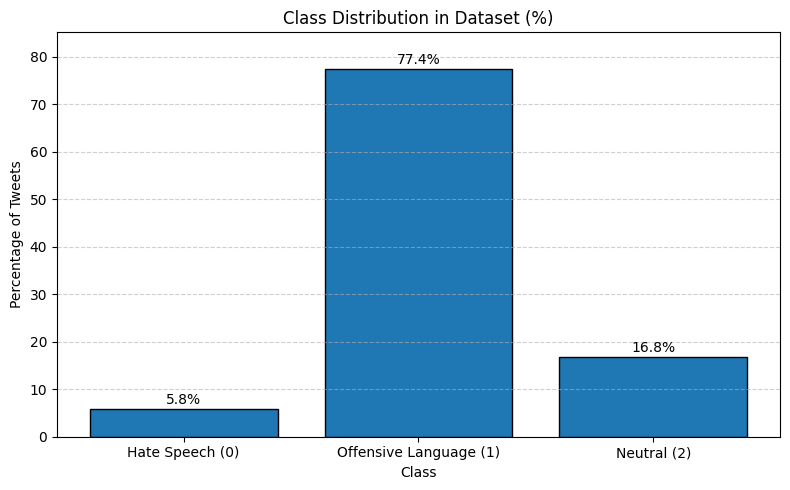

In [4]:
import matplotlib.pyplot as plt

# Calculate counts and percentages
class_counts = df['class'].value_counts().sort_index()
class_labels = ['Hate Speech (0)', 'Offensive Language (1)', 'Neutral (2)']
class_percent = class_counts / class_counts.sum() * 100

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(class_labels, class_percent, edgecolor='black')
plt.title('Class Distribution in Dataset (%)')
plt.xlabel('Class')
plt.ylabel('Percentage of Tweets')
plt.ylim(0, class_percent.max() * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate bars with percentage values
for bar, pct in zip(bars, class_percent):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        pct + 0.5,
        f'{pct:.1f}%',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()



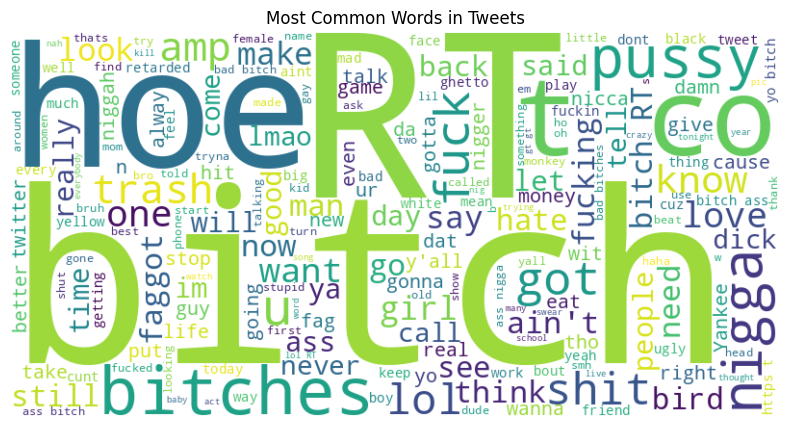

In [6]:

# Word COUNT of Tweets
from wordcloud import WordCloud

text = " ".join(df['tweet'].dropna().astype(str)) # Combine all tweets
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Tweets")
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

# Split into features and labels
X = df['cleaned_tweet']
y = df['class']
X.shape, y.shape

((24783,), (24783,))

In [ ]:
# First convert text into vectors (TF-IDF) temporarily to apply SMOTE
vectorizer = TfidfVectorizer(max_features=5000)
X_vectorized = vectorizer.fit_transform(X)
X_vectorized.shape

(24783, 5000)

In [ ]:
# Split into training and test sets before resampling
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((19826, 5000), (4957, 5000), (19826,), (4957,))

In [ ]:
# Apply SMOTE on training set only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Display class distribution before and after SMOTE
original_dist = y_train.value_counts().sort_index()
resampled_dist = pd.Series(y_train_resampled).value_counts().sort_index()

dist_df = pd.DataFrame({
    "Original": original_dist,
    "After SMOTE": resampled_dist
})
dist_df.index = ['Hate Speech (0)', 'Offensive Language (1)', 'Neutral (2)']

In [ ]:
# Check class distribution before and after SMOTE
print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", pd.Series(y_train_resampled).value_counts())

Before SMOTE:
 class
1    15352
2     3330
0     1144
Name: count, dtype: int64
After SMOTE:
 class
1    15352
2    15352
0    15352
Name: count, dtype: int64


In [ ]:
# Train Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predict and evaluate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Hate Speech (0)', 'Offensive (1)', 'Neutral (2)'])
conf_matrix = confusion_matrix(y_test, y_pred)
print(accuracy)
print(report)

0.8942909017550938
                 precision    recall  f1-score   support

Hate Speech (0)       0.62      0.15      0.24       286
  Offensive (1)       0.91      0.97      0.94      3838
    Neutral (2)       0.84      0.81      0.83       833

       accuracy                           0.89      4957
      macro avg       0.79      0.64      0.67      4957
   weighted avg       0.88      0.89      0.88      4957



In [ ]:
#parameter tuning for Logistic regression
param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'],
    'max_iter': [300, 650, 1000]
}

In [ ]:
tune_lr_model = GridSearchCV(estimator=lr_model , param_grid= param_grid_lr , cv=5 , scoring="accuracy", verbose=2)
tune_lr_model

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [300, 650, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs']},
             scoring='accuracy', verbose=2)

In [ ]:
tune_lr_model.fit(X_train , y_train)
y_pred_tuned = tune_lr_model.predict(X_test)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] END .C=0.01, max_iter=300, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=300, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=300, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=300, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=300, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......C=0.01, max_iter=300, penalty=l1, solver=saga; total time=   0.2s
[CV] END ......C=0.01, max_iter=300, penalty=l1, solver=saga; total time=   0.1s
[CV] END ......C=0.01, max_iter=300, penalty=l1, solver=saga; total time=   0.1s
[CV] END ......C=0.01, max_iter=300, penalty=l1, solver=saga; total time=   0.2s
[CV] END ......C=0.01, max_iter=300, penalty=l1, solver=saga; total time=   0.1s
[CV] END .C=0.01, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.01, max_iter=300, penalty=l1, s

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=10, max_iter=300, penalty=l1, solver=saga; total time= 1.1min


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=10, max_iter=300, penalty=l1, solver=saga; total time= 1.2min


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=10, max_iter=300, penalty=l1, solver=saga; total time= 1.1min


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=10, max_iter=300, penalty=l1, solver=saga; total time= 1.1min


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=10, max_iter=300, penalty=l1, solver=saga; total time= 1.2min
[CV] END ...C=10, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=10, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...C=10, max_iter=300, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END ...C=10, max_iter=3

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=10, max_iter=650, penalty=l1, solver=saga; total time= 2.3min


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=10, max_iter=650, penalty=l1, solver=saga; total time= 2.2min


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=10, max_iter=650, penalty=l1, solver=saga; total time= 2.2min
[CV] END ........C=10, max_iter=650, penalty=l1, solver=saga; total time= 2.2min
[CV] END ........C=10, max_iter=650, penalty=l1, solver=saga; total time= 2.2min
[CV] END ...C=10, max_iter=650, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=650, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=650, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=650, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=650, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=10, max_iter=650, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=650, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=650, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=650, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_it

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=100, max_iter=300, penalty=l1, solver=saga; total time= 3.1min


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=100, max_iter=300, penalty=l1, solver=saga; total time= 3.1min


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=100, max_iter=300, penalty=l1, solver=saga; total time= 3.1min


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=100, max_iter=300, penalty=l1, solver=saga; total time= 3.1min


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=100, max_iter=300, penalty=l1, solver=saga; total time= 3.2min
[CV] END ..C=100, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=100, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=100, max_iter=300, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END ..C=100, max_iter=3

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=100, max_iter=650, penalty=l1, solver=saga; total time= 5.3min


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=100, max_iter=650, penalty=l1, solver=saga; total time= 5.3min


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=100, max_iter=650, penalty=l1, solver=saga; total time= 5.4min


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=100, max_iter=650, penalty=l1, solver=saga; total time= 5.4min


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=100, max_iter=650, penalty=l1, solver=saga; total time= 5.5min
[CV] END ..C=100, max_iter=650, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=650, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=650, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=650, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=650, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=100, max_iter=650, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, max_iter=650, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, max_iter=650, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, max_iter=650, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, max_iter=650, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=100, max_iter=650, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END ..C=100, max_iter=6

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=100, max_iter=1000, penalty=l1, solver=saga; total time= 7.2min


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=100, max_iter=1000, penalty=l1, solver=saga; total time= 7.3min


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=100, max_iter=1000, penalty=l1, solver=saga; total time= 7.4min


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=100, max_iter=1000, penalty=l1, solver=saga; total time= 7.3min


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=100, max_iter=1000, penalty=l1, solver=saga; total time= 7.5min
[CV] END .C=100, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=100, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=100, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=100, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=100, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=100, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END .C=100, max_iter=10

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
750 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_sol

In [ ]:
tune_lr_model.best_params_

{'C': 1, 'max_iter': 300, 'penalty': 'l1', 'solver': 'saga'}

In [ ]:
tune_lr_model.best_score_

np.float64(0.9049736124015035)

In [ ]:
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)

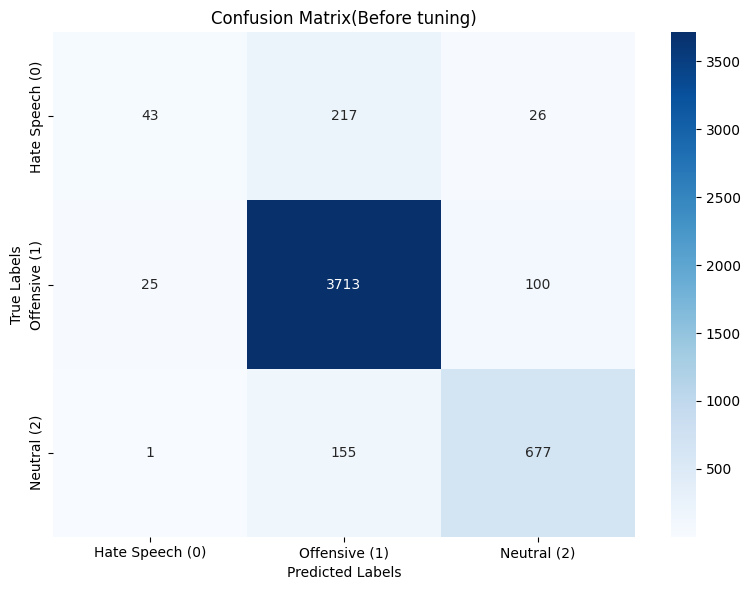

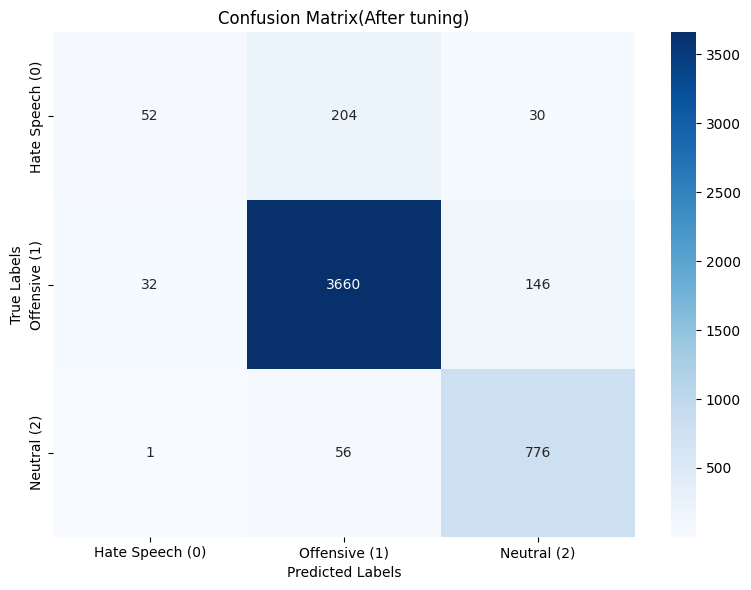

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Hate Speech (0)', 'Offensive (1)', 'Neutral (2)'],
            yticklabels=['Hate Speech (0)', 'Offensive (1)', 'Neutral (2)'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix(Before tuning)')
plt.tight_layout()
plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tuned, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Hate Speech (0)', 'Offensive (1)', 'Neutral (2)'],
            yticklabels=['Hate Speech (0)', 'Offensive (1)', 'Neutral (2)'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix(After tuning)')
plt.tight_layout()
plt.show()

In [ ]:
tuned_report_lr = classification_report(y_test, y_pred_tuned , target_names=['Hate Speech (0)', 'Offensive (1)', 'Neutral (2)'])
print("Classification Report for LR model after tuned")
tuned_report_lr

Classification Report for LR model after tuned


'                 precision    recall  f1-score   support\n\nHate Speech (0)       0.61      0.18      0.28       286\n  Offensive (1)       0.93      0.95      0.94      3838\n    Neutral (2)       0.82      0.93      0.87       833\n\n       accuracy                           0.91      4957\n      macro avg       0.79      0.69      0.70      4957\n   weighted avg       0.90      0.91      0.89      4957\n'

In [ ]:
param_grid_svm = {
    'C': [0.01, 0.1, 1, 10, 100],     # Regularization strength
    'penalty': ['l2'],                # 'l1' is only supported with 'liblinear', which isn't the default
    'loss': ['squared_hinge'],        # 'hinge' is also available but less common for modern usage
    'max_iter': [1000, 5000, 10000],  # Just in case convergence is an issue
}

In [ ]:
from sklearn.svm import LinearSVC

# Train SVM (Linear Support Vector Classifier)
svm_model = LinearSVC(class_weight='balanced', max_iter=10000)
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

# Evaluation
svm_accuracy = accuracy_score(y_test, svm_preds)

svm_report = classification_report(y_test, svm_preds, target_names=['Hate Speech (0)', 'Offensive (1)', 'Neutral (2)'])
print(svm_report)
print(" accuracy :",svm_accuracy)

                 precision    recall  f1-score   support

Hate Speech (0)       0.38      0.43      0.40       286
  Offensive (1)       0.94      0.92      0.93      3838
    Neutral (2)       0.80      0.87      0.84       833

       accuracy                           0.88      4957
      macro avg       0.71      0.74      0.72      4957
   weighted avg       0.89      0.88      0.88      4957

 accuracy : 0.8799677224127497


In [ ]:
svm_tuned_model = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
svm_tuned_model.fit(X_train, y_train)
svm_preds_tuned = svm_tuned_model.predict(X_test)

print("Best parameters found:", svm_tuned_model.best_params_)
print("Best cross-validation score:", svm_tuned_model.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters found: {'C': 0.1, 'loss': 'squared_hinge', 'max_iter': 1000, 'penalty': 'l2'}
Best cross-validation score: 0.8890853083492155


In [ ]:
svm_conf_matrix = confusion_matrix(y_test, svm_preds)
svm_tuned_conf_matrix = confusion_matrix(y_test, svm_preds_tuned)

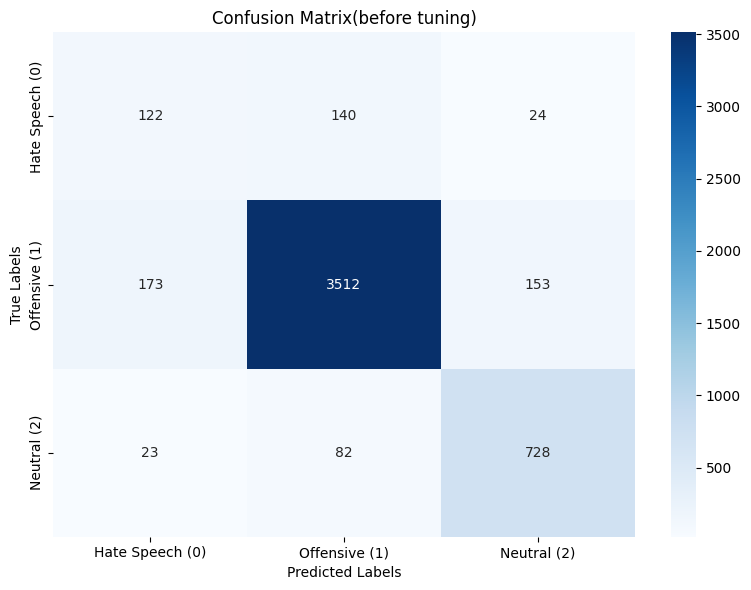

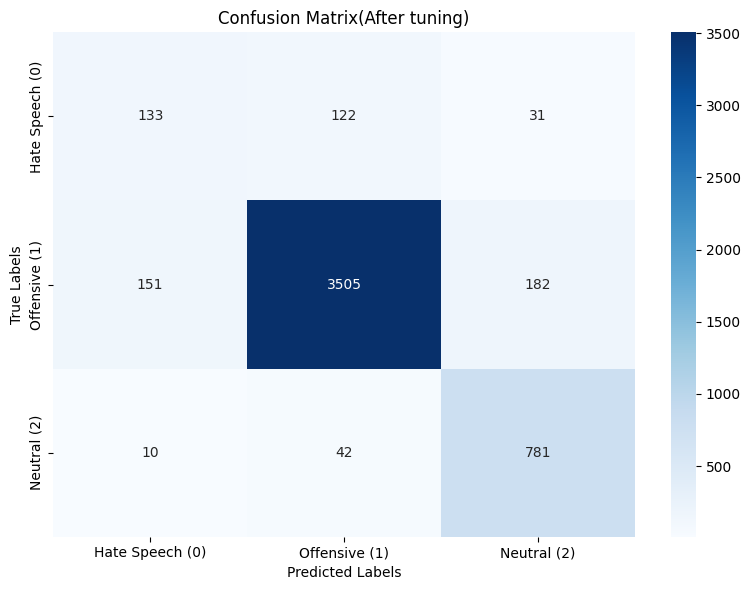

In [ ]:
# Plot confusion matrix before tuning
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Hate Speech (0)', 'Offensive (1)', 'Neutral (2)'],
            yticklabels=['Hate Speech (0)', 'Offensive (1)', 'Neutral (2)'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix(before tuning)')
plt.tight_layout()
plt.show()
# Plot confusion matrix after tuning
plt.figure(figsize=(8, 6))
sns.heatmap(svm_tuned_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Hate Speech (0)', 'Offensive (1)', 'Neutral (2)'],
            yticklabels=['Hate Speech (0)', 'Offensive (1)', 'Neutral (2)'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix(After tuning)')
plt.tight_layout()
plt.show()

In [ ]:
svm_report_tuned = classification_report(y_test, svm_preds_tuned, target_names=['Hate Speech (0)', 'Offensive (1)', 'Neutral (2)'])
print(svm_report_tuned)

                 precision    recall  f1-score   support

Hate Speech (0)       0.45      0.47      0.46       286
  Offensive (1)       0.96      0.91      0.93      3838
    Neutral (2)       0.79      0.94      0.85       833

       accuracy                           0.89      4957
      macro avg       0.73      0.77      0.75      4957
   weighted avg       0.90      0.89      0.89      4957



In [ ]:
param_grid_rf = {
    'n_estimators': [25, 50],             # Number of trees
    'max_depth': [None, 5, 10],         # Max depth of the tree
    'min_samples_split': [2, 5, 10],             # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],               # Minimum samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None],      # Number of features to consider at each split
    'bootstrap': [True, False],                  # Whether bootstrap samples are used
}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Train Random Forest
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_accuracy

0.8997377446035909

In [ ]:
rf_report = classification_report(y_test, rf_preds, target_names=['Hate Speech (0)', 'Offensive (1)', 'Neutral (2)'])
print(rf_report)

                 precision    recall  f1-score   support

Hate Speech (0)       0.53      0.22      0.31       286
  Offensive (1)       0.93      0.95      0.94      3838
    Neutral (2)       0.81      0.91      0.86       833

       accuracy                           0.90      4957
      macro avg       0.76      0.69      0.70      4957
   weighted avg       0.89      0.90      0.89      4957



In [ ]:
rf_model_tuned = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf,
                           cv=2, scoring='accuracy', n_jobs=-1, verbose=2)
rf_model_tuned.fit(X_train, y_train)
rf_preds_tuned = rf_model.predict(X_test)
rf_model_tuned.best_params_

Fitting 2 folds for each of 324 candidates, totalling 648 fits


{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 50}

In [ ]:
rf_model_tuned.best_score_

np.float64(0.8950872591546455)

In [ ]:
rf_conf_matrix = confusion_matrix(y_test, rf_preds)
rf_conf_matrix_tuned = confusion_matrix(y_test, rf_preds_tuned)

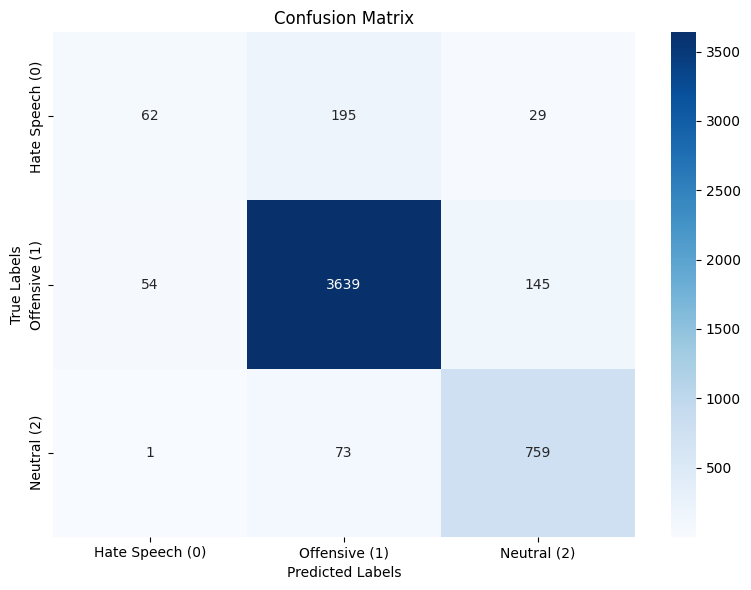

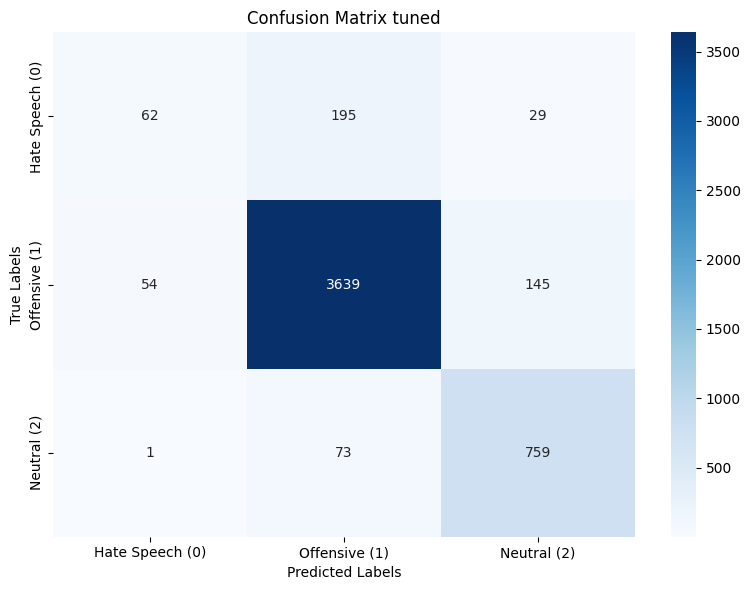

In [ ]:
import seaborn as sns
# Plot confusion matrix before tuning
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Hate Speech (0)', 'Offensive (1)', 'Neutral (2)'],
            yticklabels=['Hate Speech (0)', 'Offensive (1)', 'Neutral (2)'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Plot confusion matrix after tuning
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix_tuned, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Hate Speech (0)', 'Offensive (1)', 'Neutral (2)'],
            yticklabels=['Hate Speech (0)', 'Offensive (1)', 'Neutral (2)'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix tuned')
plt.tight_layout()
plt.show()

In [ ]:
rf_report_tuned = classification_report(y_test, rf_preds_tuned, target_names=['Hate Speech (0)', 'Offensive (1)', 'Neutral (2)'])
print(rf_report_tuned)

                 precision    recall  f1-score   support

Hate Speech (0)       0.53      0.22      0.31       286
  Offensive (1)       0.93      0.95      0.94      3838
    Neutral (2)       0.81      0.91      0.86       833

       accuracy                           0.90      4957
      macro avg       0.76      0.69      0.70      4957
   weighted avg       0.89      0.90      0.89      4957

